In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
path = '/scratch/aachar5/clim680_dataset/'
fname = 'adaptor.mars.internal-1663965452.3528512-14052-2-b47b40ba-074e-4000-baa7-e70764531a59.nc'
ds = xr.open_dataset(path+fname)


In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-23 20:37:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
ds.t

<xarray.DataArray 't' (time: 264, latitude: 721, longitude: 1440)>
[274095360 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [6]:
variable_name = 't'
ds[variable_name]

<xarray.DataArray 't' (time: 264, latitude: 721, longitude: 1440)>
[274095360 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

''

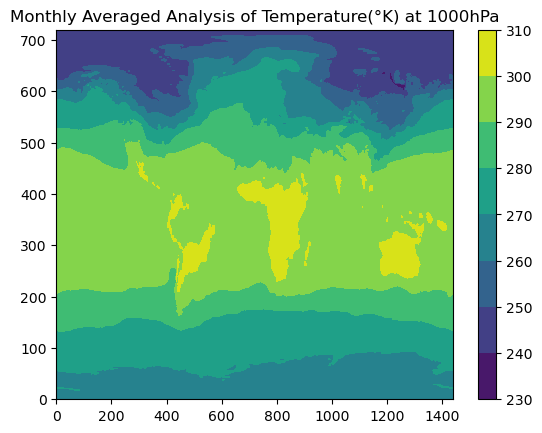

In [7]:
plt.contourf(ds['t'][0,-1::-1,:])
plt.title ('Monthly Averaged Analysis of Temperature(°K) at 1000hPa')
plt.colorbar() 
;

In [8]:
ds_mean=ds.mean(dim='time')

''

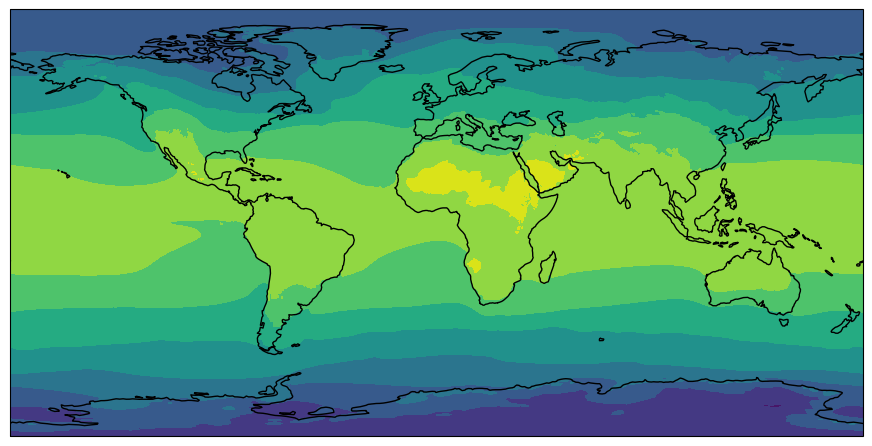

In [9]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['longitude'], ds['latitude'], ds_mean['t'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines() 
;

''

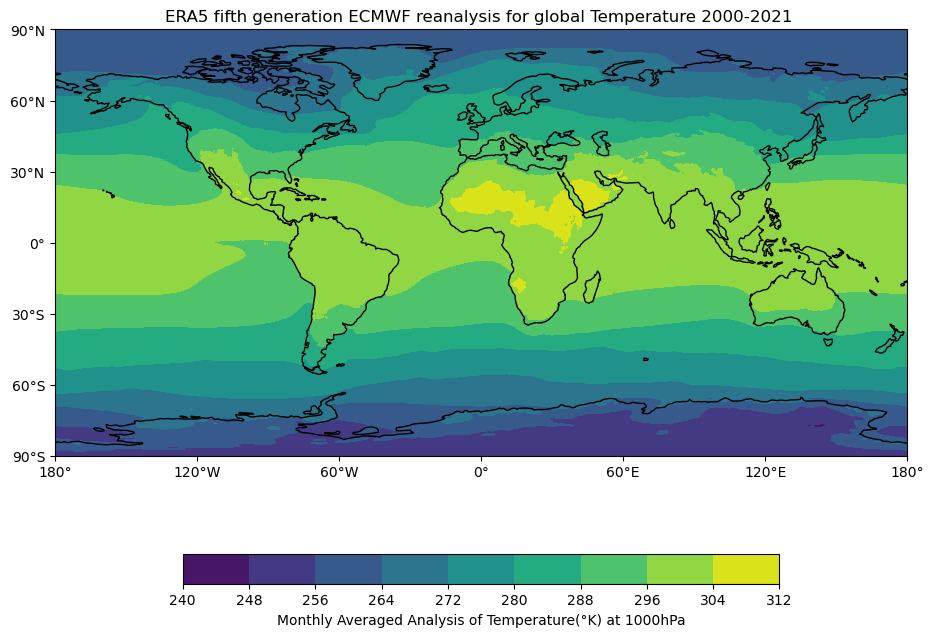

In [12]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['t']
data, lons = add_cyclic_point(data, coord=ds['longitude'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Monthly Averaged Analysis of Temperature(°K) at 1000hPa')
plt.title('ERA5 fifth generation ECMWF reanalysis for global Temperature 2000-2021 ')
;